# Carregamento de Dados
- Familiarização com a biblioteca NILMTK
- Carregamento de dados do dataset REDD

Referências:

https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/elecmeter_and_metergroup.ipynb

In [1]:
import nilmtk

In [2]:
from nilmtk.dataset_converters import convert_redd
convert_redd(r'.\data\low_freq', r'.\data\redd.h5')

Loading house 1... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 11 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 
Loaded metadata
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


In [3]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

redd = DataSet(r'.\data\redd.h5')
redd.set_window(start='2011-04-18', end='2011-05-05')

In [4]:
print_dict(redd.buildings)

In [12]:
print_dict(redd.buildings[1].metadata)

In [13]:
elec = redd.buildings[1].elec

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


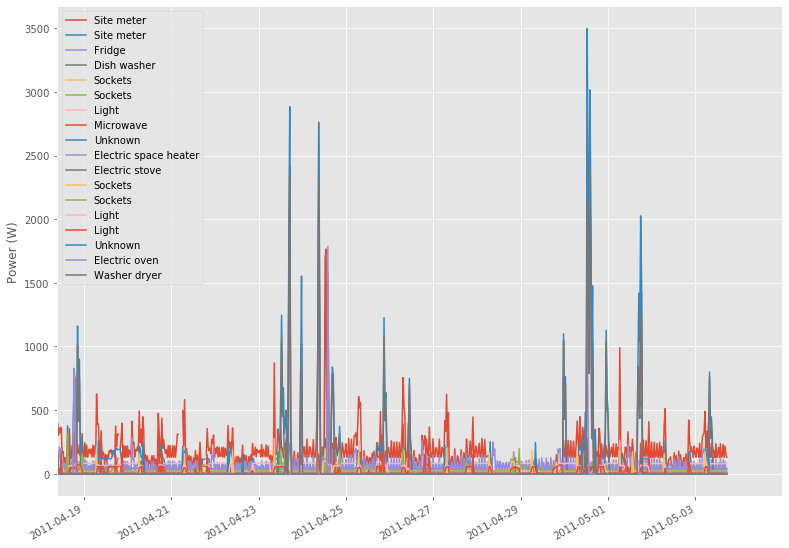

In [14]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

elec.plot();

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


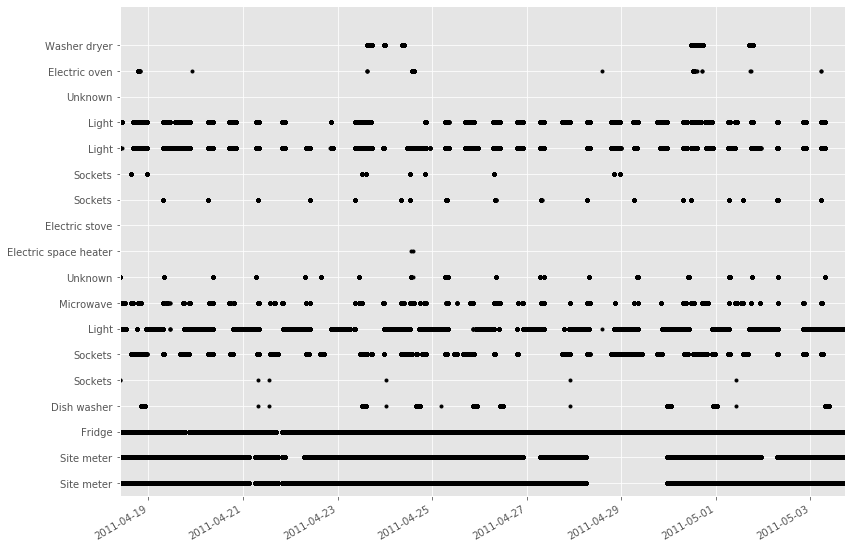

In [15]:
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40);

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


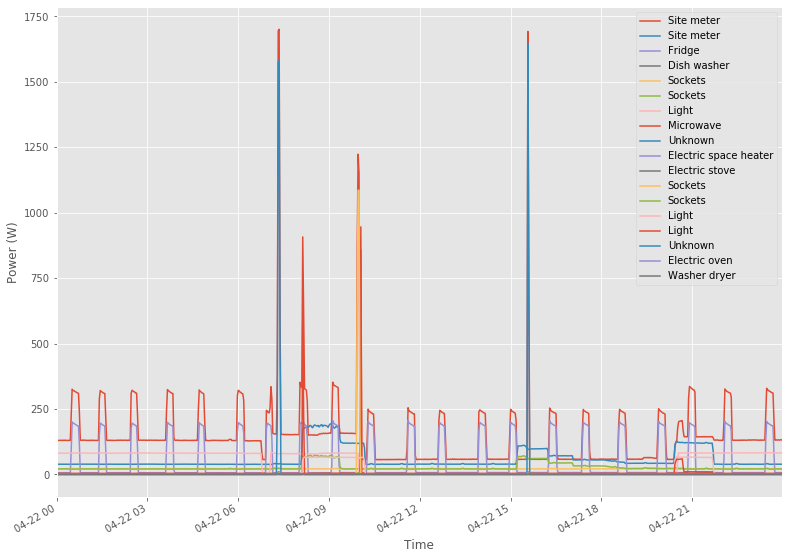

In [16]:
redd.set_window(start='2011-04-22', end='2011-04-23')
elec.plot();
plt.xlabel("Time");
redd.set_window(start='2011-04-18', end='2011-05-05')

In [17]:
df = next(redd.buildings[1].elec[11].load())
df

physical_quantity,power
type,active
2011-04-18 09:22:13-04:00,5.0
2011-04-18 09:22:16-04:00,5.0
2011-04-18 09:22:20-04:00,5.0
2011-04-18 09:22:23-04:00,5.0
2011-04-18 09:22:26-04:00,5.0
...,...
2011-05-03 17:33:03-04:00,4.0
2011-05-03 17:33:06-04:00,4.0
2011-05-03 17:33:10-04:00,4.0
